<a href="https://colab.research.google.com/github/alexlopespereira/mba_enap/blob/main/CD/Atividades_Exercicios/Aula1_Atividades_Exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Atividades e Exercícios (vale nota)
### Compartilhe o seu caderno com o professor enviando o link para o seu caderno [neste formulário](https://forms.gle/UYvwc6SpA6HyiqdM6).



### Importar as bibliotecas

In [1]:
import numpy as np # Importar o numpy
import pandas as pd

## Atividade 1.1
#### Vamos tentar reproduzir este [gráfico](http://berkeleyearth.org/dv/temperature-change-vs-carbon-dioxide-concentration/) que mostra a correlação entre o aumento de emissão de CO2 e o aumento médio da temperatura global.
#### Não precisa ficar exatamente igual. Use o seu bom senso de quantos detalhes quer adicionar ao gráfico.



```
Dados de CO2: "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
Dados de temperatura: "https://datahub.io/core/global-temp/r/annual.csv"
```





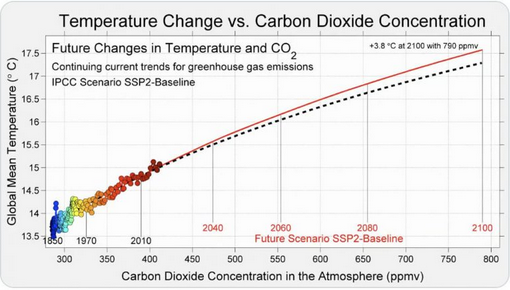

In [ ]:
### Meu prompt na perplexity
### replique esse grafico em python usando pandas e plotnine. Os dados de CO2 estão nesta URL "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv". Pesquise alguma fonte de dados que tem os dados de temperatura media global. Produza um grafico o codigo de um grafico o mais proximo do grafico dessa imagem.





,Year,co2,co2_per_capita,co2_including_luc,population,Mean,Global_Mean_Temp
0,1850,196.848,0.153,2835.459,1.287034e+09,-0.4177,13.3823
1,1851,198.779,NaN,3018.492,NaN,-0.2333,13.5667
2,1852,207.595,NaN,3065.094,NaN,-0.2294,13.5706
3,1853,217.237,NaN,3122.835,NaN,-0.2704,13.5296
4,1854,255.039,NaN,3169.879,NaN,-0.2915,13.5085


In [29]:
!pip install scikit-misc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.6/183.6 kB 678.4 kB/s eta 0:00:00


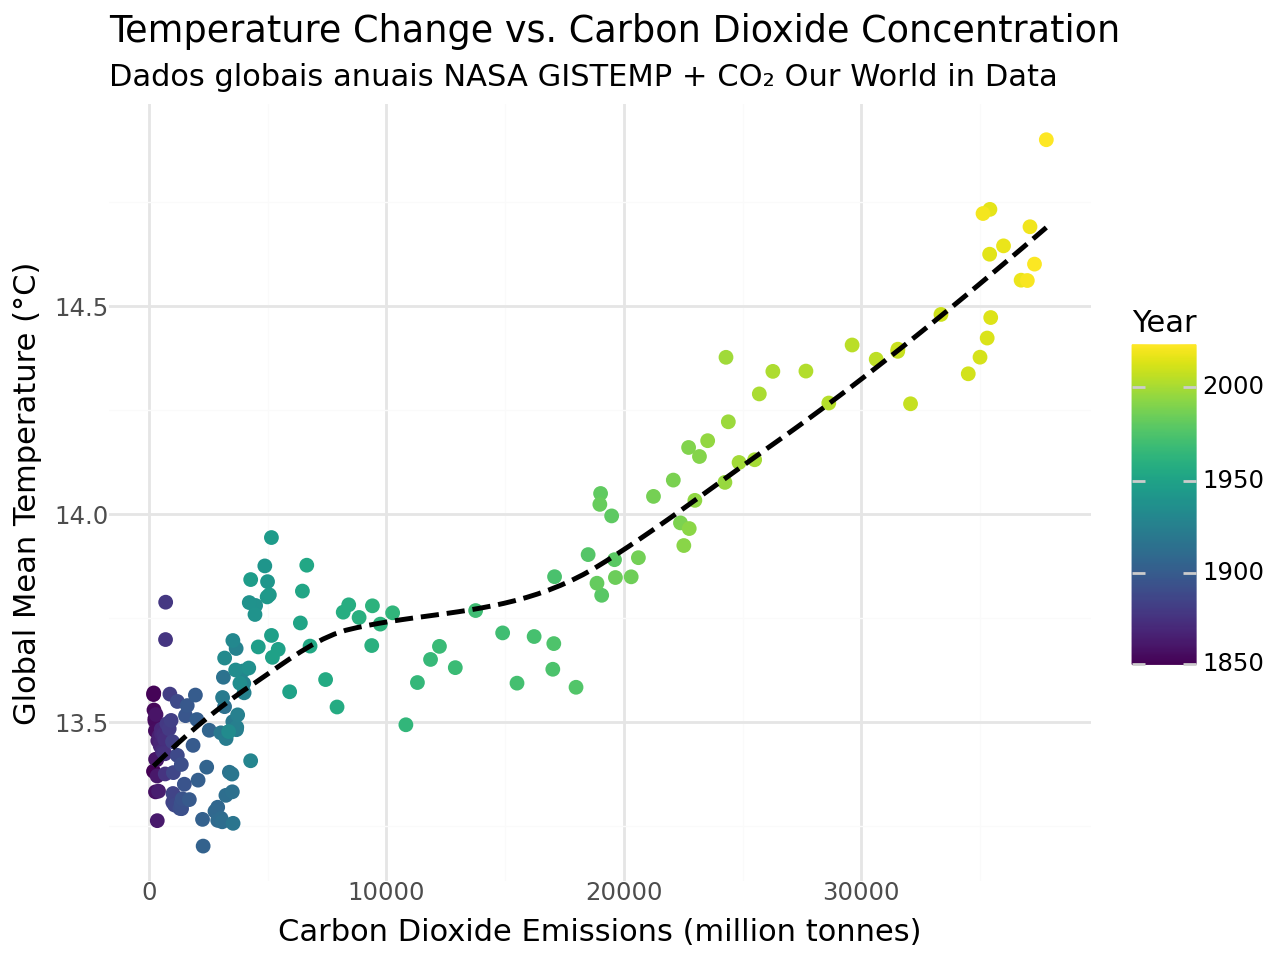

In [ ]:
# Gráfico similar ao da imagem


## Exercício 1.1
### Repita o gráfico Seasonal Changes presente nesse link http://berkeleyearth.lbl.gov/regions/global-land.

### Não precisa ficar igual, porém, quanto mais você se aproximar, maior será o seu domínio sobre a ferramenta de graficos. É uma oportunidade para você treinar sua capacidade de pesquisar uma solução para um problema específico.



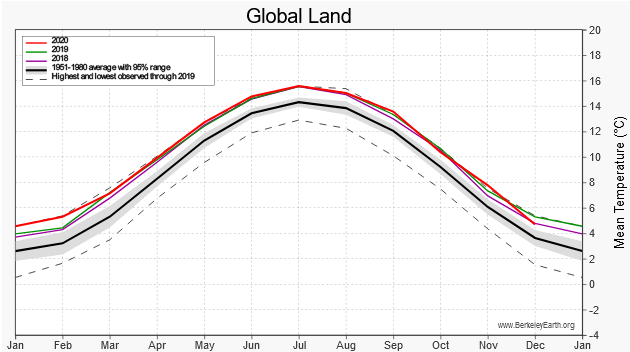



#### Plote as séries de 2016 a 2020 (ou 2022, à sua escolha) separadamente. E uma linha média com seu intervalo de confiança de 95% para os  anos de 1950 a 1980.
#### Você vai precisar dos dados de máximo e mínimo para o ano de 2019 (ou 2022, à sua escolha). Podem ser encontrados [aqui](https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Complete_TMAX_complete.txt) e [aqui](https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Complete_TMIN_complete.txt).